# Modul 3 Andat : Script Pmel NOAA
Pada script ini mencakup 4 visualisasi data,
1. Plot Time Series
2. Plot FFT
3. Plot Low-Pass Filter
4. Plot Hovmoller Time Depth

Author : Salbi Faza Rinaldi (September, 2020)

In [2]:
#import Library
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Comic Sans MS']
import scipy.fft as fft
from scipy import signal

In [1]:
sst = pd.read_excel('Modul3Andat2.xlsx',sheet_name='ScriptPMELLNOAA',index_col=0) #[Disesuaikan]

sst['Tanggal'] = sst.index.tolist()
sst['Tanggal'] = sst['Tanggal'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
sst['Tanggal'] = sst['Tanggal'].dt.strftime('%d %b %Y')
sst = sst.set_index(sst['Tanggal'])
sst.drop('Tanggal', axis=1, inplace=True)
sst.drop('QUALITY',axis=1,inplace=True)
sst.replace(-9.999,np.nan,inplace=True)
sst.interpolate(method='linear',limit_direction='both',inplace=True)

display (sst.head())

NameError: name 'pd' is not defined

## 1. Plot Time Series 
plot ini digunakan untuk melihat variasi temporal dari suhu di lokasi tertentu

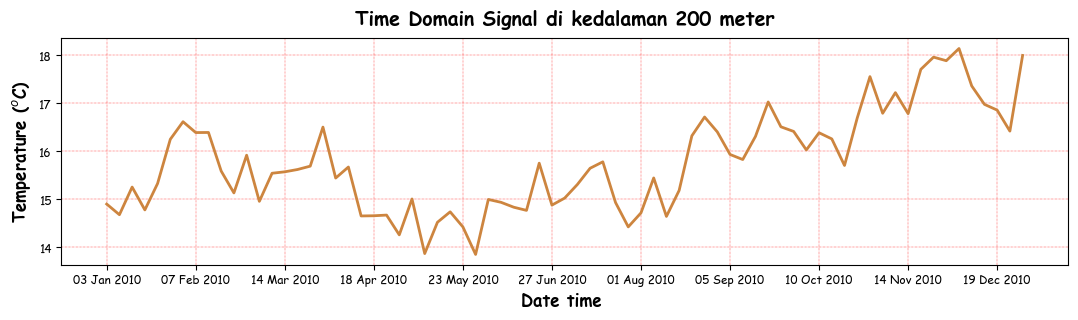

In [17]:
depth = 200 #[CHANGE HERE for depth]
year = 2010 #[CHANGE HERE for year]
daerah = '0N 180W' #[CHANGE HERE for Coordinate]

sst_index = sst.index[0:len(sst.index):7]
sst_nindex = np.arange(0,len(sst.index),7)

# Plot Data Time Domain Signal 
fig, ax = plt.subplots(figsize=(13,3),dpi=100)
ax.plot(sst[depth], color ='peru', lw = 2)

ax.set_title('Time Domain Signal di kedalaman '+ str(depth) + ' meter',
             weight='bold', fontsize=14, pad = 10)
ax.set_xlabel('Date time ', weight='bold', fontsize=12)
ax.set_ylabel('Temperature ($^o$C)', weight='bold', fontsize=12)
ax.grid(color='r', ls = '-.', lw = 0.25)
plt.yticks(fontsize = 8.5)
plt.xticks(sst_nindex,sst_index,fontsize = 8.5)

#export gambar, berikan directory lokasi export
plt.savefig('Kedalaman 1 Timeseries.png',dpi=300)

#show gambar tanpa export
plt.show()

## 2. Plot FFT
plot ini digunakan untuk melihat data dalam domain periode dan frekuensi

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


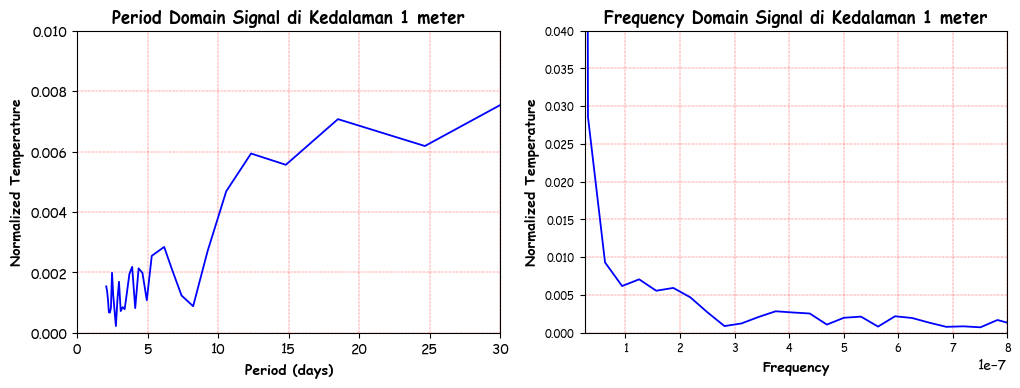

In [4]:
Ts = 3600*24*5 # Sampling periode dalam hari 
Fs = 1 / Ts # Sampling frekuensi
n = len(sst) # Jumlah data

fft_sst = fft(sst[depth],n) # FFT data sst di kedalaman depth
fff_sst = fft_sst[0:round(n/2)] # Pemotongan Mirror Signal
fff_sst = fff_sst/fft_sst.max()
xfft = Fs/n*np.arange(0,round(n/2))
pfft = (1./xfft)/(Ts) # Periode

# Plot data
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4),dpi=100)
ax1.plot(pfft,abs(fff_sst),color='b', lw = 1.3)
ax2.plot(xfft,abs(fff_sst), color = 'b', lw = 1.3)

ax1.set_title('Period Domain Signal di Kedalaman ' + str(depth) + ' meter', weight='bold')
ax1.set_xlabel('Period (days)', weight='bold')
ax1.set_ylabel('Normalized Temperature', weight='bold')

ax2.set_title('Frequency Domain Signal di Kedalaman ' + str(depth) + ' meter', weight='bold')
ax2.set_xlabel('Frequency', weight='bold')
ax2.set_ylabel('Normalized Temperature', weight='bold')

ax1.set(xlim=(0,30),ylim=(0,0.01)) #[CHANGE HERE with the limit of axis Figure]
ax2.set(xlim=(.000000025,.0000008),ylim=(0,0.04)) #[CHANGE HERE with the limit of axis Figure]
ax2.ticklabel_format(axis='x',scilimits=(0,0))

ax1.grid(color='r', ls = '-.', lw = 0.25)
ax2.grid(color='r', ls = '-.', lw = 0.25)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8) 

#export gambar, berikan directory lokasi export
#plt.savefig('...',dpi=300)

#show gambar tanpa export
plt.show()

## 3. Plot Low-pass Filter
plot ini digunakan untuk membandingkan raw data dengan hasil filternya

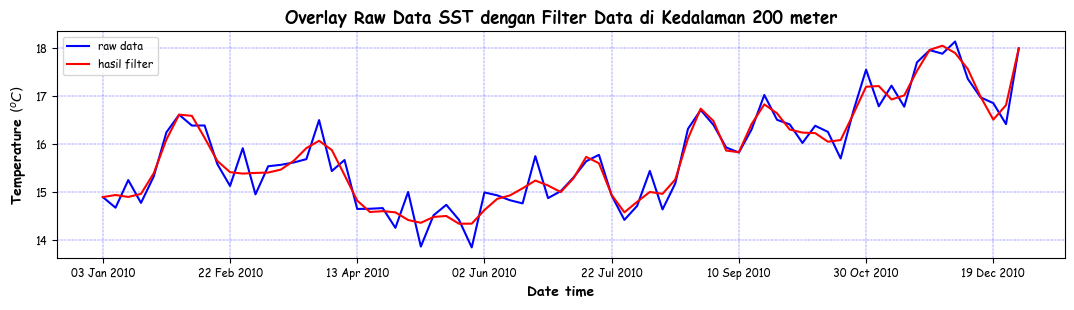

In [18]:
Ts = 3600*24*5 # periode pengambilan data dalam sekon
fs = 1/Ts  # Frekuensi sampling, satuan Hz

fc = 1/(3600*24*20)  # Frekuensi cut-off = 20 hari, satuan 1/s atau Hz
w = fc / (fs / 2) # Normalisasi frekuensi

b, a = signal.butter(5, w, 'low') # desain filter untuk 'low pass'
sst_filter = signal.filtfilt(b, a, sst[depth]) # implementasi filter ke data

sst['sst_filter'] = sst_filter

sst_index = sst.index[0:len(sst.index):10]
sst_nindex = np.arange(0,len(sst.index),10)

# Plot Data
fig, ax = plt.subplots(figsize=(13,3),dpi=100)

ax.plot(sst[depth],color = 'b', label='raw data') 
ax.plot(sst['sst_filter'],color = 'r', label='hasil filter')

ax.set_xlabel('Date time',weight='bold')
ax.set_ylabel('Temperature $(^oC)$',weight='bold') 
ax.set_title('Overlay Raw Data SST dengan Filter Data di Kedalaman ' + 
             str(depth) + ' meter', weight='bold')
ax.legend(loc='best',fontsize=8)
ax.grid(color='b', ls = '-.', lw = 0.25)
plt.xticks(sst_nindex,sst_index,fontsize=8)
plt.yticks(fontsize=8)

#export gambar, berikan directory lokasi export
#plt.savefig('...',dpi=300)

#show gambar tanpa export
plt.show()

## 4. Plot Hovmoller Depth Time
plot ini digunakan untuk melihat variasi suhu terhadap kedalaman dan waktu

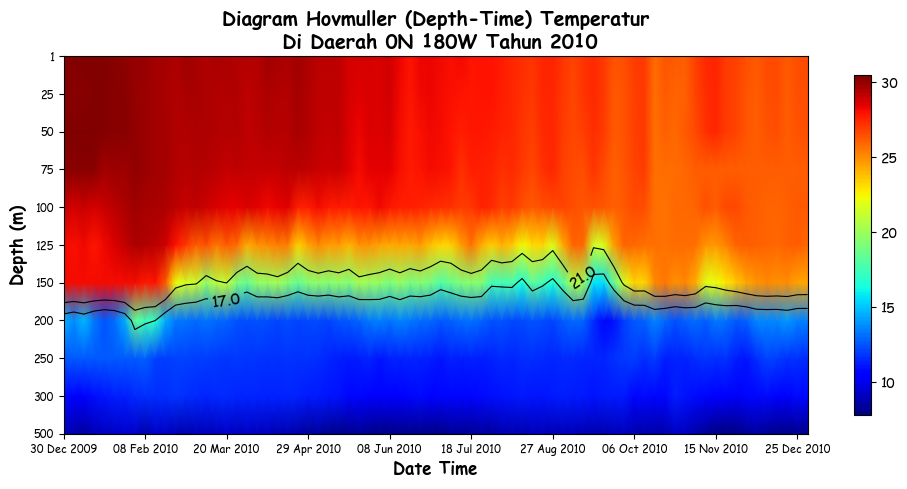

In [6]:
sst.drop('sst_filter',axis=1,inplace=True)

data = sst.transpose()
hovmoller = data.reindex(index=data.index[::-1])

xticks = data.columns[0:len(hovmoller.columns):8]
yticks = hovmoller.index
xnticks = np.arange(0,len(hovmoller.columns),8)
ynticks = np.arange(0,len(hovmoller.index),1)

# Plot Data
fig, ax = plt.subplots(figsize=(12,5),dpi=100)
im = ax.pcolormesh(hovmoller,cmap='jet',shading='gouraud')
cs = plt.contour(hovmoller, [17,21], colors='k',linewidths=.8)

ax.set_title('Diagram Hovmuller (Depth-Time) Temperatur'+
             '\n Di Daerah '+ daerah + ' Tahun '+ str(year),
             weight='bold',fontsize = 14)
ax.set_xlabel('Date Time',weight='bold',fontsize=12)
ax.set_ylabel('Depth (m)',weight='bold',fontsize=12)

plt.clabel(cs, fmt = '%2.1f', fontsize=11)
fig.colorbar(im,ax=ax, shrink = .9)

plt.xticks(xnticks,xticks, fontsize=8)
plt.yticks(ynticks,yticks, fontsize=8)

#export gambar, berikan directory lokasi export
#plt.savefig('...',dpi=300)

#show gambar tanpa export
plt.show()